# **EMPLOYEE ACCESS IN AMAZON.COM**

*Build algorithm to predict approval  or denial for an unseen employees*

0->Denial
1->Approve

<!-- from IPython.display import Image -->
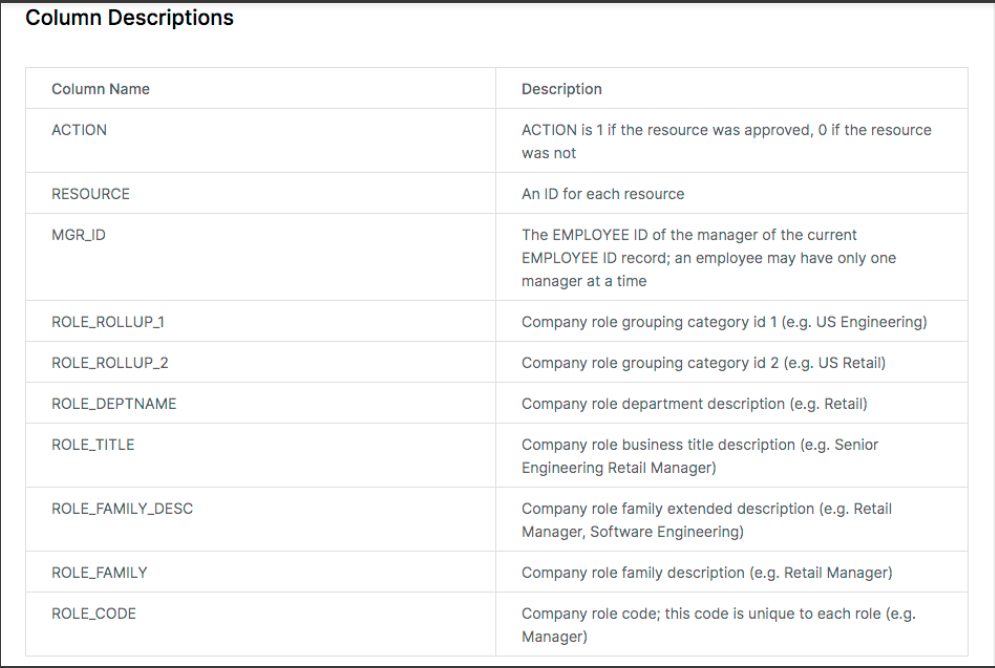

In [1]:
from pyforest import*
lazy_imports()

['import seaborn as sns',
 'import pydot',
 'from sklearn.ensemble import RandomForestRegressor',
 'import skimage',
 'import xgboost as xgb',
 'import os',
 'from sklearn.preprocessing import StandardScaler',
 'import torch',
 'from PIL import Image',
 'from sklearn.linear_model import LogisticRegression',
 'import spacy',
 'from sklearn.preprocessing import RobustScaler',
 'from scipy import stats',
 'import matplotlib as mpl',
 'import plotly.graph_objs as go',
 'from xlrd import open_workbook',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import KFold',
 'import fastai',
 'import pandas as pd',
 'import awswrangler as wr',
 'from sklearn.preprocessing import OneHotEncoder',
 'import textblob',
 'from sklearn.manifold import TSNE',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import bokeh',
 'from sklearn.decomposition import PCA',
 

In [2]:
train = pd.read_csv("train.csv")

<IPython.core.display.Javascript object>

In [3]:
train

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [4]:
test = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

In [5]:
test

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...,...
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [6]:
print("The size of train data",train.shape)
print("The size of test data",test.shape)

The size of train data (32769, 10)
The size of test data (58921, 10)


In [7]:
for i in train.columns:
    print(i)

ACTION
RESOURCE
MGR_ID
ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE


In [8]:
for  i in test.columns:
    print(i)

id
RESOURCE
MGR_ID
ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE


*WE CAN SEE THAT TRAIN HAS ACTION AND TEST DOESNT HAVE ACTION WHICH IS THE TARGET VARIABLE*

**CATBOOST**
(CAT->CATEGORICAL)

In [9]:
#!pip  install catboost

In [10]:
from catboost.datasets import amazon # we have imported from catboost

traindf , testdf = amazon()

In [11]:
print("The size of train data ",traindf.shape)
print("The size of test data ",testdf.shape)

The size of train data  (32769, 10)
The size of test data  (58921, 10)


In [12]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [13]:
traindf.apply(lambda x:len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [14]:
traindf['MGR_ID'].value_counts()

MGR_ID
770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: count, Length: 4243, dtype: int64

**DISTRIBUTION OF FEATURES**

DISPLOT

In [15]:
traindf.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

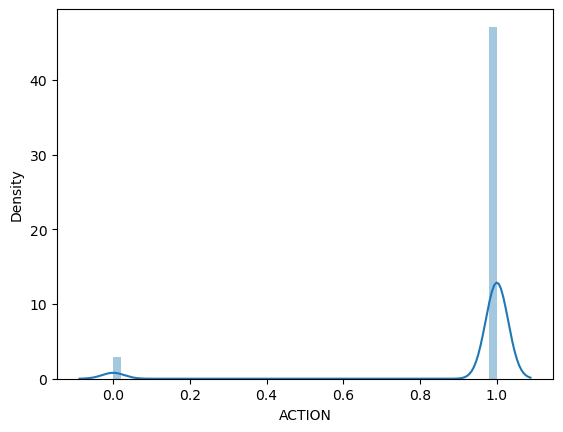

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

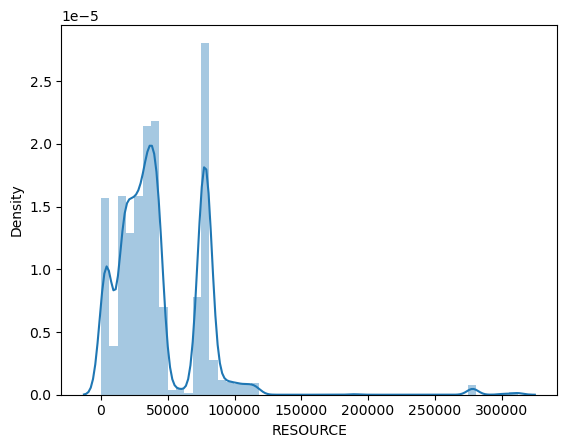

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

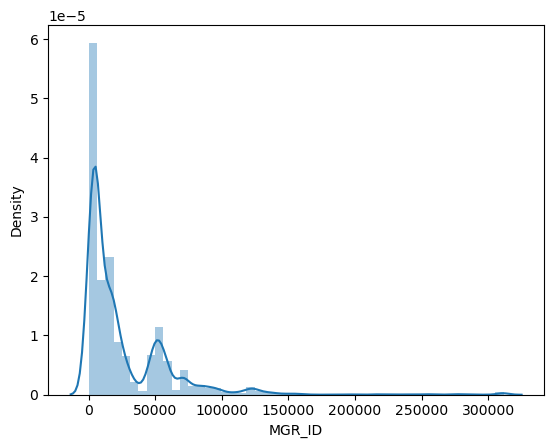

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

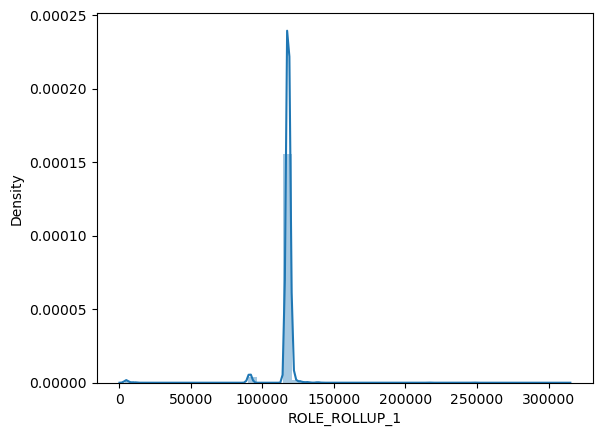

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

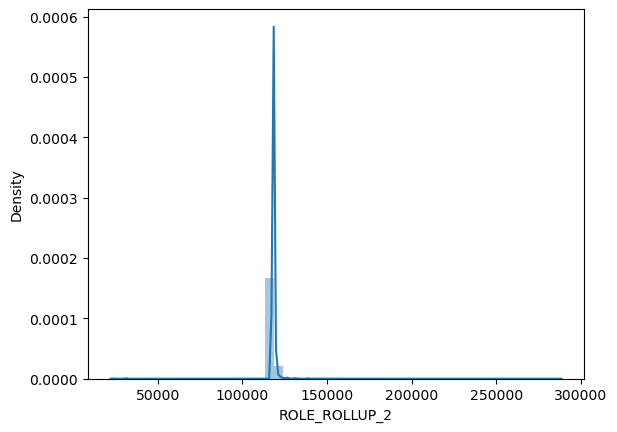

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

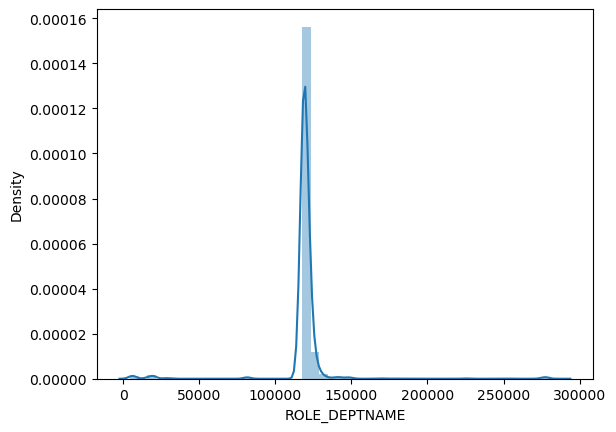

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

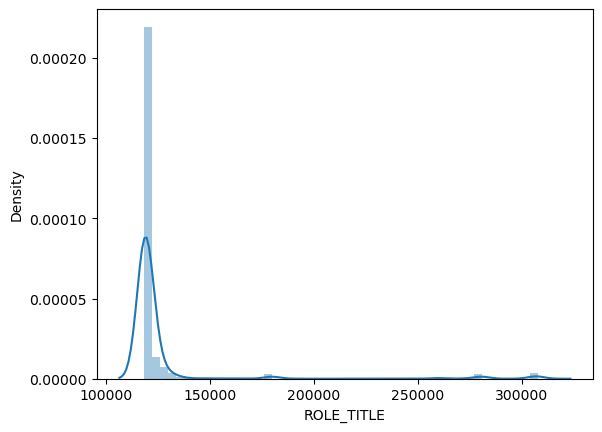

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

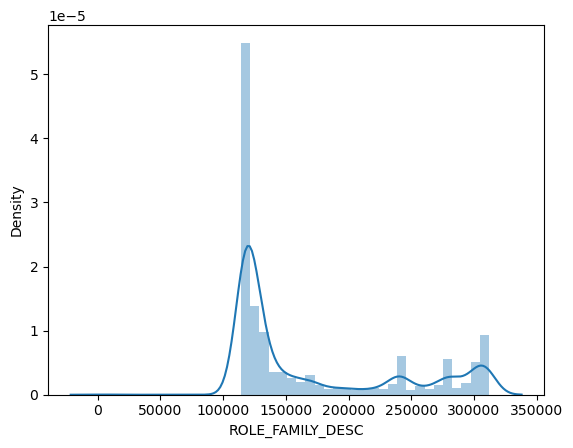

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

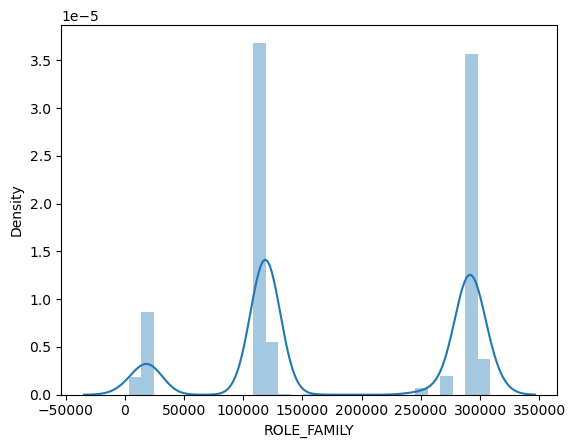

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

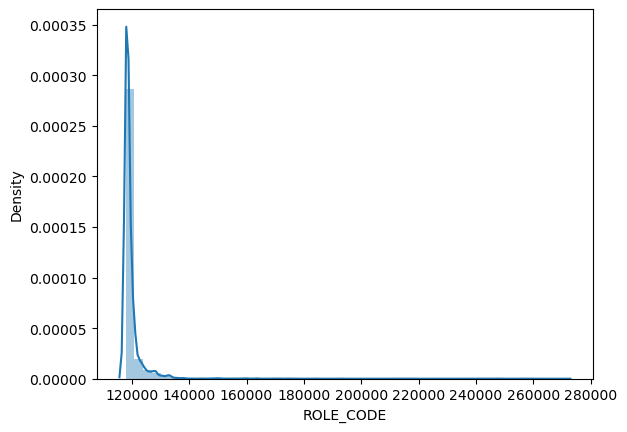

In [16]:
import warnings
warnings.filterwarnings('ignore')
for i in traindf.describe().columns:
    sns.distplot(traindf[i].dropna())
    plt.show()

*BOXPLOT*

In [17]:
traindf['ACTION'].value_counts() # Data imbalance

ACTION
1    30872
0     1897
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

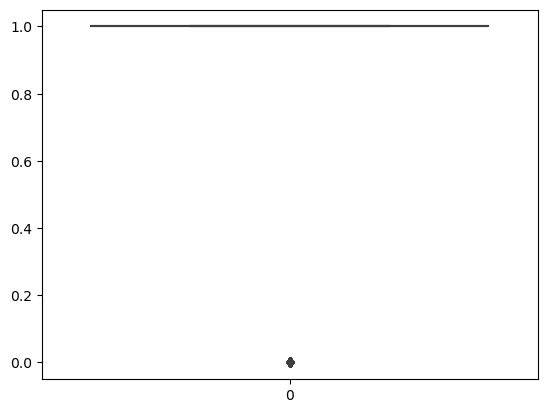

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

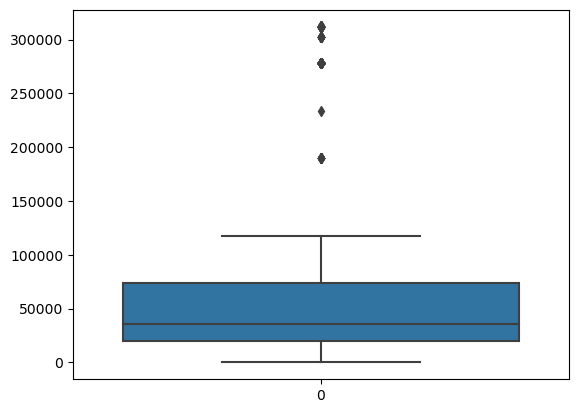

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

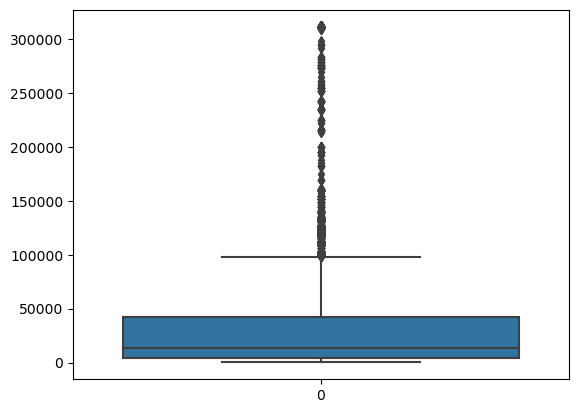

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

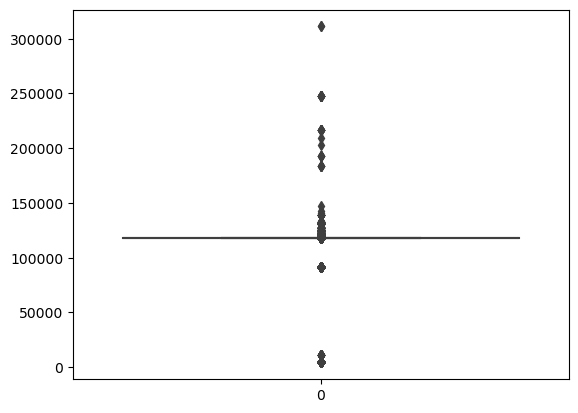

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

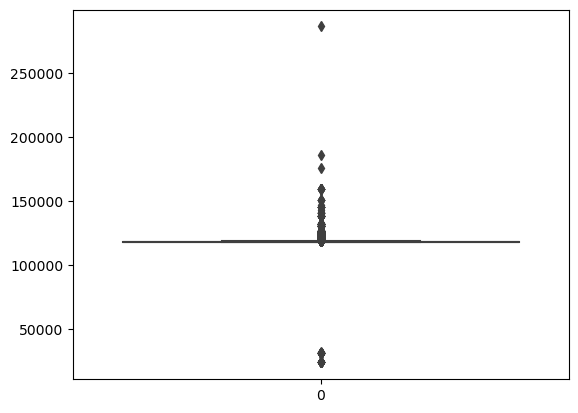

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

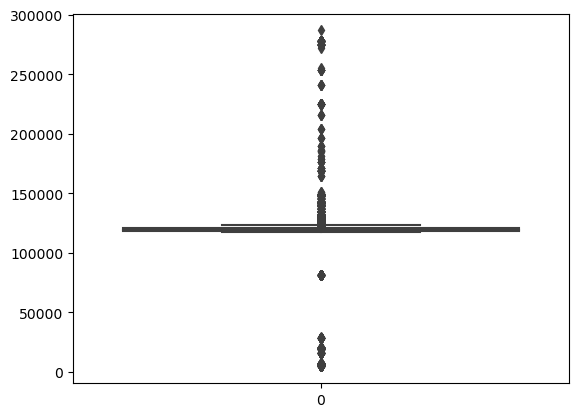

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

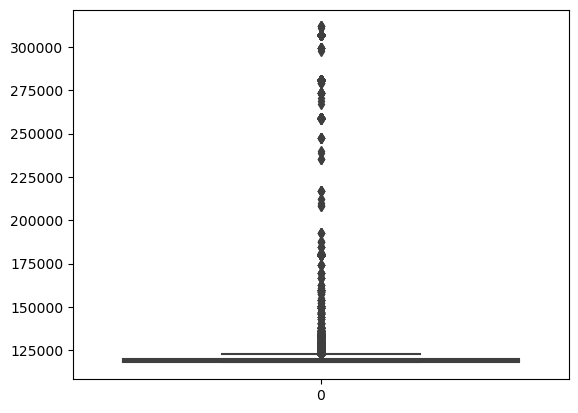

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

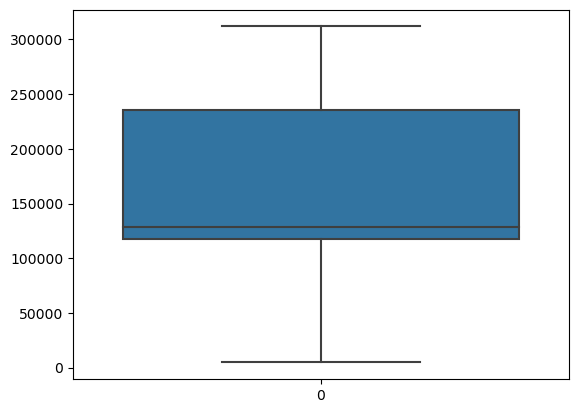

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

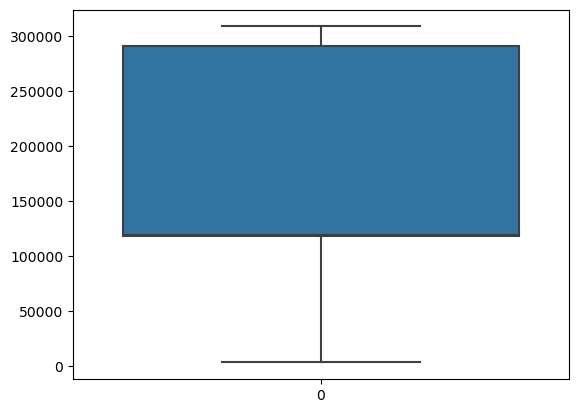

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

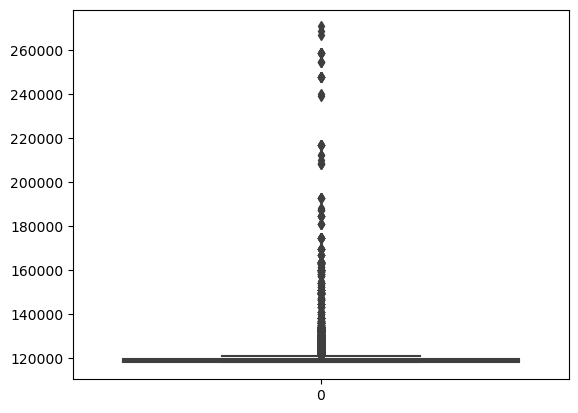

In [18]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

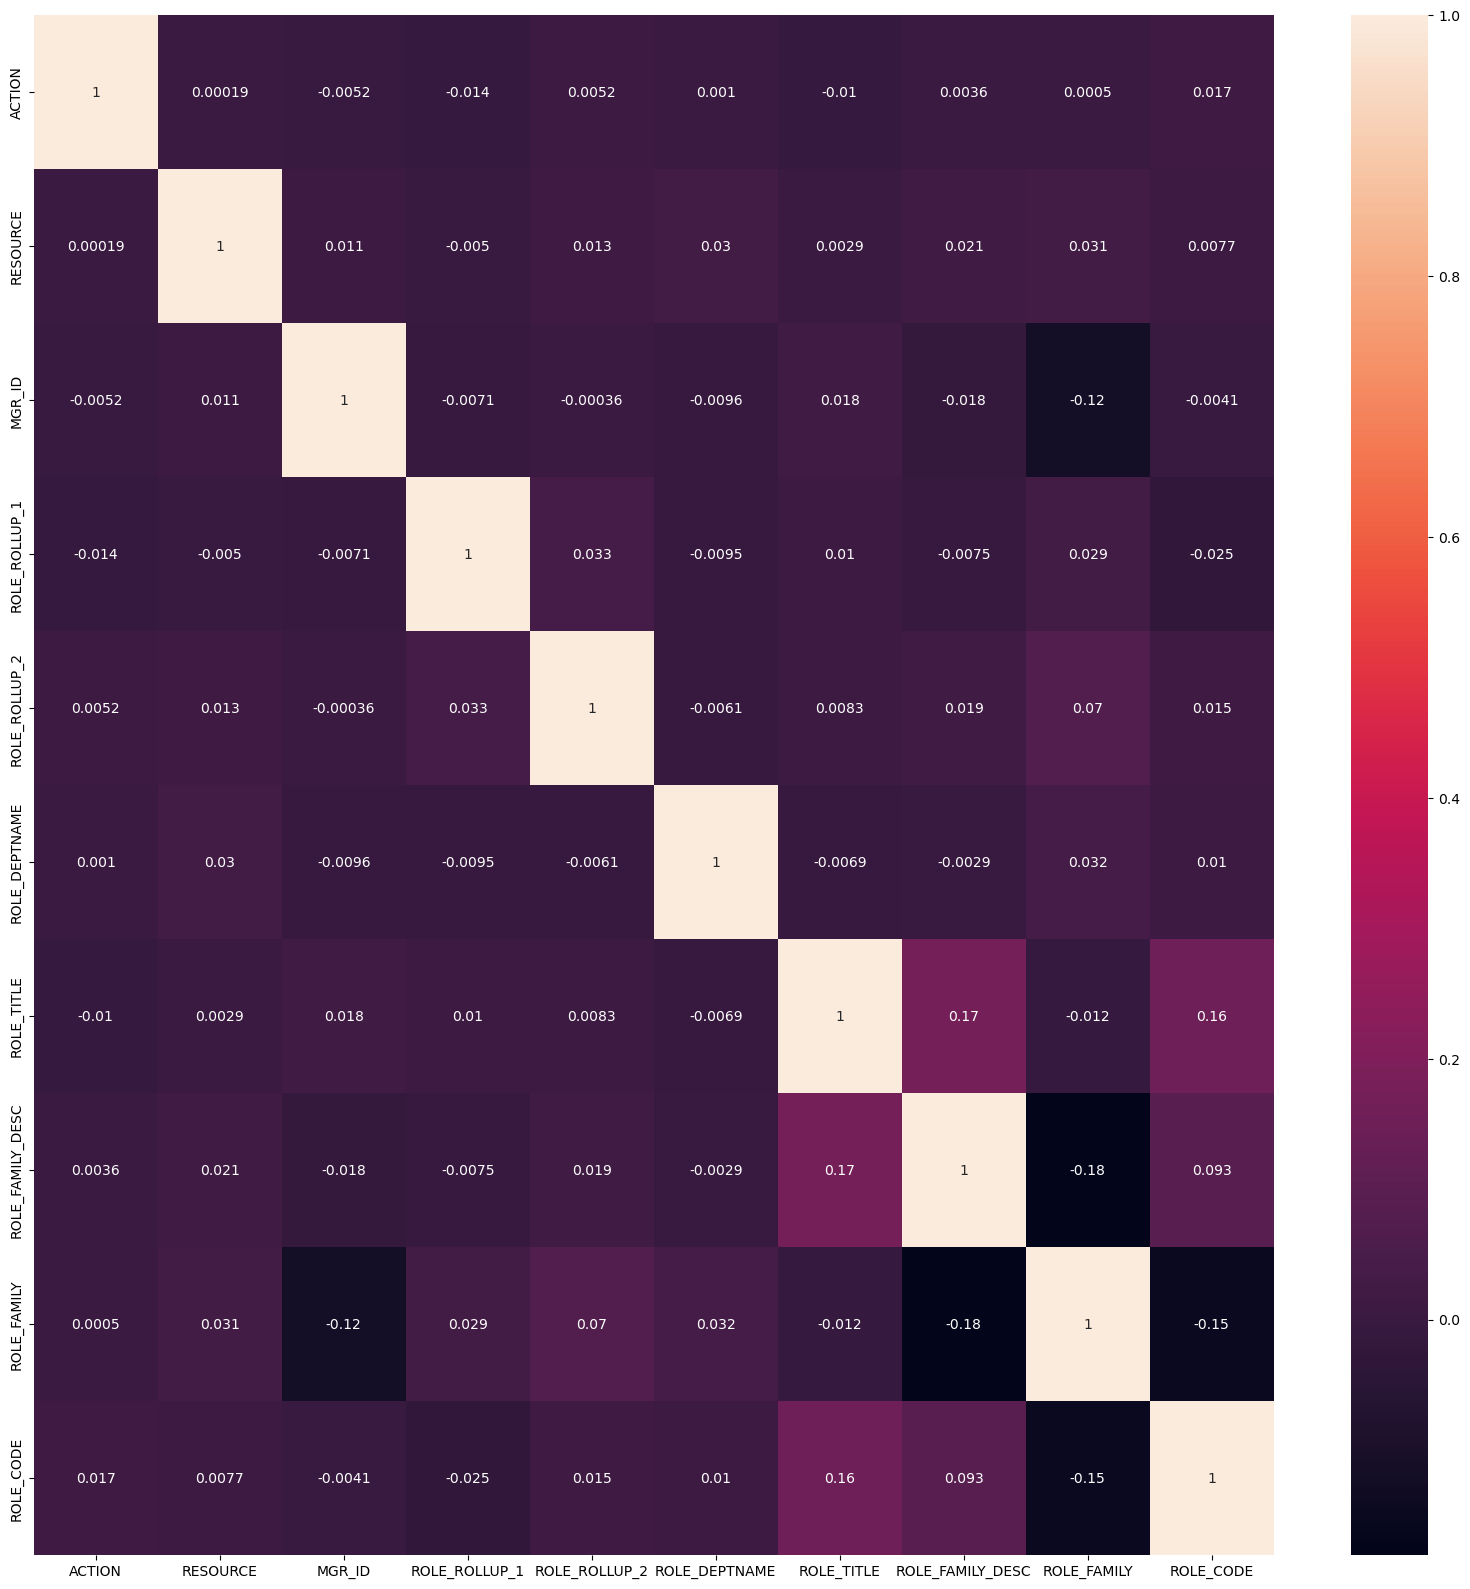

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(traindf.corr(),annot=True)
plt.show()

**MODEL BUILDING**

In [20]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [21]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [22]:
x = traindf.drop("ACTION",axis = 1)
y = traindf["ACTION"]
x_test = testdf.drop("id",axis = 1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [25]:
from catboost import CatBoostClassifier

In [26]:
%%time

params = {'eval_metric':'AUC',
          'verbose':200,
          'random_seed':1
         }

catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(x_train,y_train,
               eval_set = (x_valid,y_valid),
               use_best_model=True,
              );


Learning rate set to 0.068702
0:	test: 0.5411584	best: 0.5411584 (0)	total: 171ms	remaining: 2m 51s
200:	test: 0.8054496	best: 0.8054496 (200)	total: 2.44s	remaining: 9.68s
400:	test: 0.8234160	best: 0.8234160 (400)	total: 4.52s	remaining: 6.75s
600:	test: 0.8331189	best: 0.8332287 (587)	total: 6.58s	remaining: 4.37s
800:	test: 0.8374659	best: 0.8382637 (781)	total: 8.67s	remaining: 2.15s
999:	test: 0.8430064	best: 0.8434854 (989)	total: 10.7s	remaining: 0us

bestTest = 0.8434853835
bestIteration = 989

Shrink model to first 990 iterations.
CPU times: total: 10.7 s
Wall time: 11.1 s


In [27]:
x.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [28]:
categorical_features = list(range(x.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [29]:
%%time

params = {'eval_metric':'AUC',
          'cat_features':categorical_features,
          'verbose':200,
          'random_seed':1
         }

catmodel = CatBoostClassifier(**params)
catmodel.fit(x_train,y_train,
               eval_set = (x_valid,y_valid),
               use_best_model=True,
              );

Learning rate set to 0.068702
0:	test: 0.5000000	best: 0.5000000 (0)	total: 30.1ms	remaining: 30s
200:	test: 0.8900235	best: 0.8901240 (197)	total: 51.7s	remaining: 3m 25s
400:	test: 0.8934668	best: 0.8935823 (388)	total: 2m 1s	remaining: 3m
600:	test: 0.8945714	best: 0.8948400 (516)	total: 3m 5s	remaining: 2m 2s
800:	test: 0.8917077	best: 0.8948400 (516)	total: 3m 57s	remaining: 59s
999:	test: 0.8896660	best: 0.8948400 (516)	total: 4m 48s	remaining: 0us

bestTest = 0.8948400433
bestIteration = 516

Shrink model to first 517 iterations.
CPU times: total: 3min 19s
Wall time: 4min 48s


In [30]:
feature_imp =catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.913241
1,ROLE_DEPTNAME,16.512425
2,MGR_ID,14.815541
3,ROLE_ROLLUP_2,12.460265
4,ROLE_FAMILY_DESC,9.947457
5,ROLE_TITLE,8.648032
6,ROLE_FAMILY,8.073697
7,ROLE_ROLLUP_1,6.411501
8,ROLE_CODE,3.217841


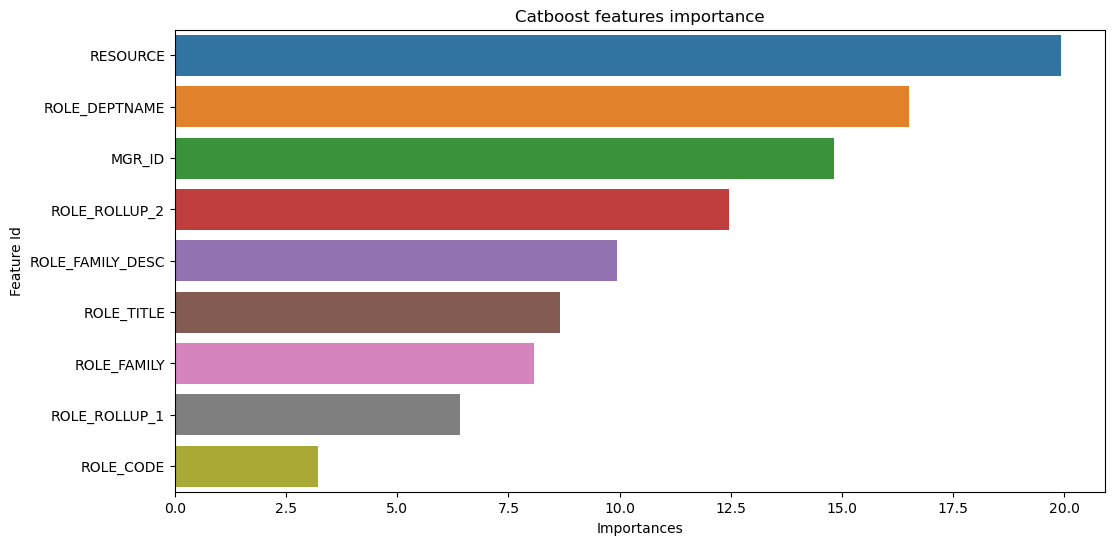

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6));
sns.barplot(x='Importances',y='Feature Id',data = feature_imp );
plt.title('Catboost features importance');

In [32]:
predict = catmodel.predict(x_test)

In [33]:
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
catmodel.score(x_valid,y_valid)

0.9532092360899196

In [35]:
traindf['ACTION'].value_counts()

ACTION
1    30872
0     1897
Name: count, dtype: int64